<div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">
    Car Price Prediction Project
</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**

### **Introduction**

The used car market in Kenya is a vibrant and evolving landscape, where a wide range of vehicles are bought and sold regularly. Navigating this market can be challenging, as both buyers and sellers often face the difficulty of determining fair prices due to various influencing factors such as age, mileage, and condition of the vehicles. Accurate price estimation is crucial for making informed decisions in this dynamic market.

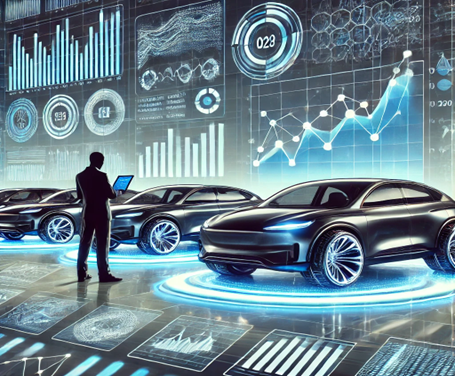

*Figure 1: A visual depiction of predictive analytics integrated with modern automotive sales.*

---

### **Overview**  
In today's era of data-driven decision-making, **machine learning** has emerged as a powerful tool for predicting used car prices with remarkable accuracy. By leveraging **historical data**, machine learning models can uncover key factors influencing car prices, thus aiding both **buyers** and **sellers** in making informed decisions.  
This project focuses on creating a machine learning model tailored specifically to the **Kenyan market**, aiming to predict the value of used cars based on various features.

---

### **Objective**  
The primary objective of this project is to develop a **reliable machine learning model** that predicts the prices of used cars in **Kenya**. The model will consider different factors, such as the car’s **age**, **mileage**, and **condition**, to estimate its market value. The ultimate goal is to empower users with a tool that provides **informed decisions** in the Kenyan used car market.

---

### **Business Understanding**

#### **Problem Statement**  
Determining a fair and accurate price for a used vehicle in **Kenya** can be a challenging task due to the wide range of factors that influence car value. **Both buyers and sellers** require a robust system capable of providing reliable price estimates to enable smoother and more transparent transactions.

#### **Objectives**  
1. **Develop a predictive model** capable of accurately estimating the prices of used cars in Kenya.  
2. **Identify key factors** influencing car prices, such as age, mileage, and condition.  
3. **Create a user-friendly application** that allows users to input car details and receive accurate price estimates, aiding them in decision-making.

---




## Data Understanding

The data for this project was sourced from various **Kenyan online marketplaces** and **classified listings**. This dataset contains car listings from **2021**, capturing key information such as the car’s **make**, **model**, **year of manufacture**, **mileage**, **fuel type**, **transmission**, and the listed price. This data forms the foundation for building the predictive model and offers valuable insights into the Kenyan used car market.


With a substantial size of 6,019 entries, this dataset offers valuable insights for our analysis. It encompasses a range of features pertinent to the Kenyan automotive market. Below is a description of the dataset's columns:
#### Dataset Overview:
- **Source:** Kenyan Vehicle Listings
- **Total Rows:** 6,019
- **Total Columns:** 11

#### Column Details:

| **Column Name**       | **Description**                                              | **Data Type**    |
|------------------------|--------------------------------------------------------------|------------------|
| **No**                 | Unique identifier for each vehicle listing.                | Integer (int64)  |
| **Name**               | Model name of the vehicle.                                 | String (object)  |
| **Year**               | Year the vehicle was manufactured.                          | Integer (int64)  |
| **Kilometers_Driven**  | Total distance covered by the vehicle in kilometers.        | Integer (int64)  |
| **Fuel_Type**          | Type of fuel used by the vehicle (e.g., petrol, diesel).    | String (object)  |
| **Transmission**       | Transmission type of the vehicle (e.g., manual, automatic). | String (object)  |
| **Use**                | where the ehicle was previously used (e.g foreign,local)   | String (object)  |
| **Engine**             | Engine capacity or specification of the vehicle.           | String (object)  |
| **Power**              | Power output of the vehicle’s engine, typically in brakehorsepower. | String (object)  |
| **Seats**              | Number of seats available in the vehicle.                  | Integer (int64)  |
| **Car_price**          | Price of the vehicle listed in Kenyan Shillings.            | Float (float64)  |

---

In [1]:
# Importing necessary libraries

# Data manupulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge ,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import pickle   

## Loading Data

In [2]:
# Class for loading our data as well as offering a summary of the info of our data
class DataLoader:
    def __init__(self, file):
        self.file = file
        self.data = None

    def load_data(self):
        try:
            self.data = pd.read_excel(self.file)
            return self.data
        except FileNotFoundError:
            print(f"File not found: {self.file}")
        except pd.errors.EmptyDataError:
            print("No data: File is empty")
        except ValueError:
            print("ValueError: Check the Excel file for potential issues")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    def data_info(self, n=5):
        if self.data is not None:
            print(f"Shape: {self.data.shape}")
            print(f"Dataframe info:")
            self.data.info()
            print(f"Descriptive Statistics:\n{self.data.describe()}")
            print(f"Columns:\n{self.data.columns.tolist()}")
            print(f"Data Types for each column:\n{self.data.dtypes}")
            print(f"The first {n} rows:\n{self.data.head(n)}")
        else:
            print("Data is not loaded.")

# Calling an instance of the class

file = 'car_data.xlsx'
data_loader = DataLoader(file)
df = data_loader.load_data()



Next, we will get an overview of the dataset.

In [3]:
# Calling datainfo method
data_loader.data_info()

Shape: (6019, 11)
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Car_price          6019 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 517.4+ KB
Descriptive Statistics:
                No         Year  Kilometers_Driven        Seats     Car_price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6.01

From our stastics we can observe that the average car price is 1.583 milllion ,average number of seats is  5 seats,average kilometers driven is 58000 kilometers and average year of vehicle manufacturing is 2013

## Data Preparation

### 1: Data Cleaning

At these stage we will clean our data using the following steps

**. Completeness** - we will check for missing values , how they affect our data set and  handle them

**. Consistency** - we will check for duplicate values and handle them

**. Uniformity** - we will check for uniformity in column naming, column data types

In [4]:
class DataCleaner(DataLoader):
    def __init__(self, file):
        super().__init__(file)
    
    def unclean_data(self):
        print(f'df before cleaning:\n{df.isnull().sum()}')
        print(f'Duplicates: {df.duplicated().sum()}')

        return
    
    def clean_data(self):
        df = self.load_data()
        
        if df is not None:
            # Remove non-numeric characters and convert to float for 'Engine' and 'Power'
            df['Engine'] = df['Engine'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
            df['Power'] = df['Power'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

            # Fill missing values in 'Engine', 'Power', and 'Seats' with the median and mode
            df['Engine'] = df['Engine'].fillna(df['Engine'].median())
            df['Power'] = df['Power'].fillna(df['Power'].median())
            df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])

            # Convert data types
            df['Year'] = df['Year'].astype(int)
            df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(int)
            df['Seats'] = df['Seats'].astype(int)
            df['Car_price'] = df['Car_price'].astype(float)

            # Standardize text data
            df['Name'] = df['Name'].str.lower()
            df['Fuel_Type'] = df['Fuel_Type'].str.lower()
            df['Transmission'] = df['Transmission'].str.lower()
            df['Use'] = df['Use'].str.lower()

            df['Use'] = df['Use'].str.strip()
            df['Use'] = df['Use'].replace({'third': 'local', 'fourth & above': 'local'})
            
            return df
        else:
            print("Data loading failed, cleaning process aborted.")
            return None
        
# Calling an instancce of a  the class        
data_cleaner = DataCleaner(file)

In [5]:
data_cleaner.unclean_data()
cleaned_df = data_cleaner.clean_data()

# Confirming our cleaning and previewing our cleaned_df
cleaned_df.info()

cleaned_df.head(10)



df before cleaning:
No                    0
Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Use                   0
Engine               36
Power                36
Seats                42
Car_price             0
dtype: int64
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int32  
 3   Kilometers_Driven  6019 non-null   int32  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  C

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,maruti wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,maruti ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0
5,5,hyundai eon lpg era plus option,2012,75000,lpg,manual,foreign,814.0,55.20,5,392450.0
6,6,nissan micra diesel xv,2013,86999,diesel,manual,foreign,1461.0,63.10,5,584500.0
7,7,toyota innova crysta 2.8 gx at 8s,2016,36000,diesel,automatic,foreign,2755.0,171.50,8,2922500.0
8,8,volkswagen vento diesel comfortline,2013,64430,diesel,manual,foreign,1598.0,103.60,5,868400.0
9,9,tata indica vista quadrajet ls,2012,65932,diesel,manual,local,1248.0,74.00,5,325650.0


Our data is clean

### 2: Feature engineering

By creating a column age we are ablle to observe the age of the vehicle by substracting the vehicle manufacture year by the current year 2024

In [6]:
# Creating a new column age
cleaned_df['age'] = 2024 - cleaned_df['Year']
cleaned_df

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price,age
0,0,maruti wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0,14
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0,9
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0,13
3,3,maruti ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0,12
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,maruti swift vdi,2014,27365,diesel,manual,foreign,1248.0,74.00,5,793250.0,10
6015,6015,hyundai xcent 1.1 crdi s,2015,100000,diesel,manual,foreign,1120.0,71.00,5,668000.0,9
6016,6016,mahindra xylo d4 bsiv,2012,55000,diesel,manual,local,2498.0,112.00,8,484300.0,12
6017,6017,maruti wagon r vxi,2013,46000,petrol,manual,foreign,998.0,67.10,5,442550.0,11


### 3: EDA

In [7]:
# Odometer Reading Distribution (KDE Plot):

In [46]:
print(type(kilometers_data))
print(kilometers_data.shape)
print(kilometers_data[:10])  # Check the first few values

<class 'numpy.ndarray'>
(6019,)
[72000 41000 46000 87000 40670 75000 86999 36000 64430 65932]


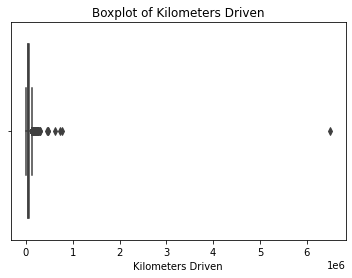

In [49]:
# Boxplot
sns.boxplot(x=kilometers_data)
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

In [ ]:
# Plotting Car Listings by Fuel Type

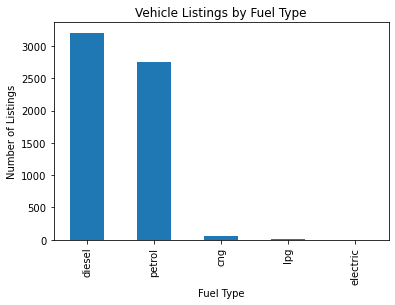

In [51]:
cleaned_df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.show()

In [ ]:
# Manufacturer Listings Distribution (Bar Plot):

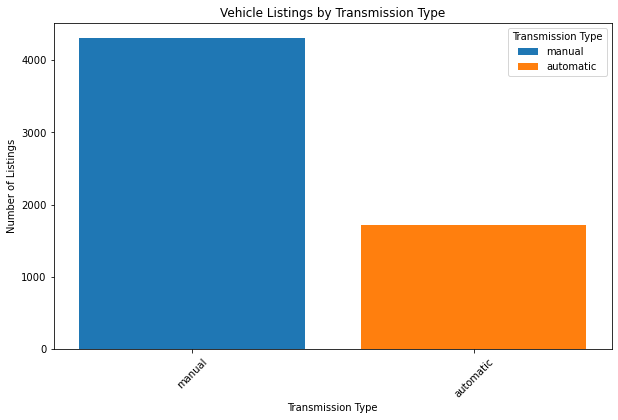

In [66]:
transmission_counts = cleaned_df['Transmission'].value_counts()

# Plot histogram with different colors
plt.figure(figsize=(10, 6))

# Get a colormap with distinct colors
colors = plt.get_cmap('tab10').colors

# Plot each transmission type in a different color
for i, (transmission_type, count) in enumerate(transmission_counts.items()):
    plt.bar(transmission_type, count, color=colors[i % len(colors)], label=transmission_type)

plt.title('Vehicle Listings by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.legend(title='Transmission Type')
plt.show()

 There is a higher prevalence of manual transmission vehicles

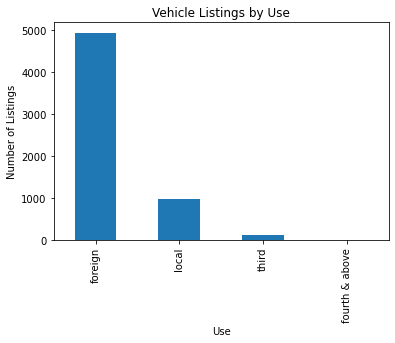

In [55]:
# Plot the number of vehicle listings by use type
cleaned_df['Use'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Use')
plt.xlabel('Use')
plt.ylabel('Number of Listings')
plt.show()

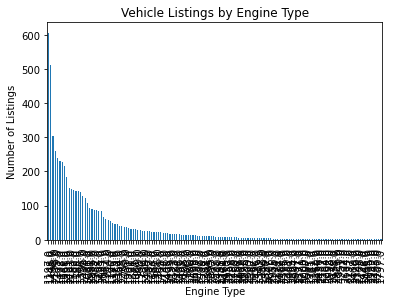

In [56]:
# Plot the number of vehicle listings by engine type
cleaned_df['Engine'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Listings')
plt.show()

The univariate analysis reveals key insights into the characteristics of the vehicle listings in the dataset. The price distribution suggests a concentration around a  price range, while the year of manufacture indicates that relatively newer vehicles are more common. The transmission type analysis shows a preference for manual vehicles, and the engine type analysis provides insights into the market's fuel preferences.

## Multivariate Analysis

In [ ]:
# Price vs. Age (Scatter Plot):

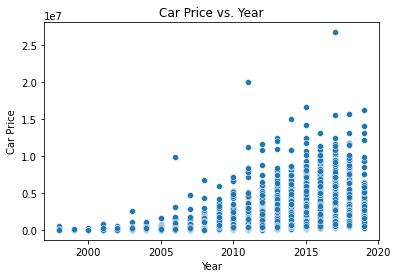

In [57]:
sns.scatterplot(x=cleaned_df['Year'], y=cleaned_df['Car_price'])
plt.title('Car Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Price vs. Kilometers Driven (Scatter Plot)

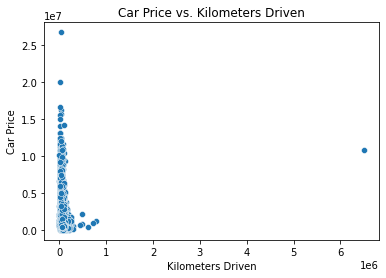

In [58]:
sns.scatterplot(x=cleaned_df['Kilometers_Driven'], y=cleaned_df['Car_price'])
plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Price vs. Engine Capacity (Box Plot):

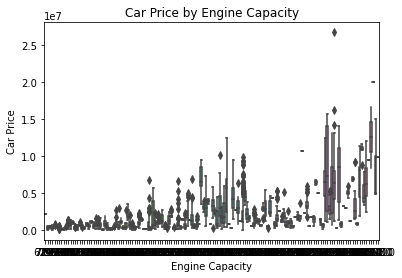

In [60]:
sns.boxplot(x='Engine', y='Car_price', data=cleaned_df)
plt.title('Car Price by Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Correlation Matrix:

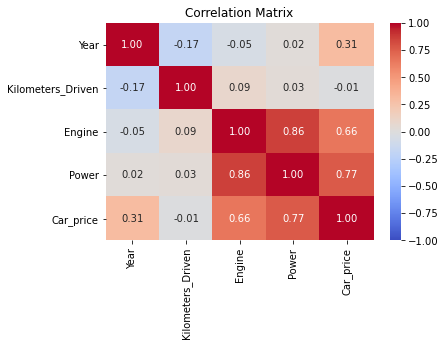

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns and calculate the correlation matrix
corr = cleaned_df[['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Car_price']].corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix helps quantify these relationships and confirms the patterns observed in the scatter and box plots.
- **Year** shows a **positive correlation with car price**, supporting the observation that newer cars are typically more expensive.
- **Kilometers** Driven has a **negative correlation with car price**, reinforcing the idea that higher mileage tends to reduce a car's value.
- **Engine Capacity** and **Power** likely show moderate to strong positive correlations with car price, suggesting that vehicles with larger engines and more power generally command higher prices.


### Exploratory Data Analysis

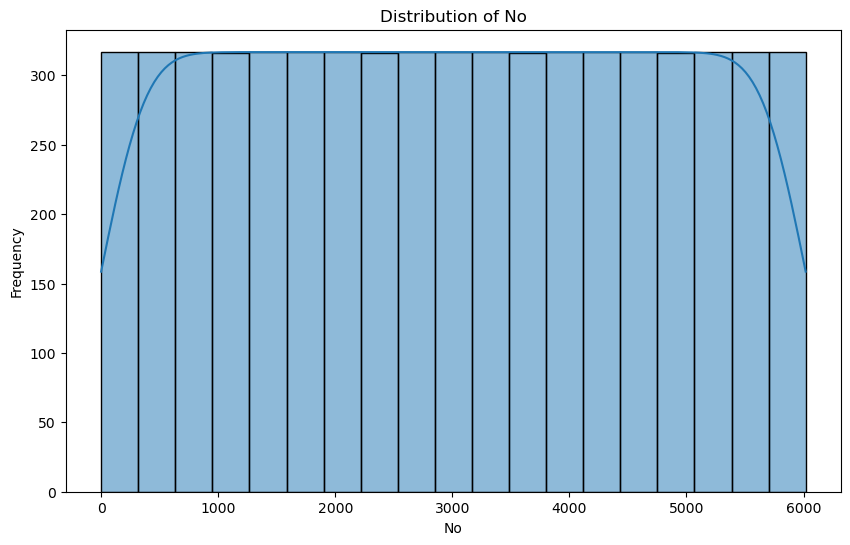

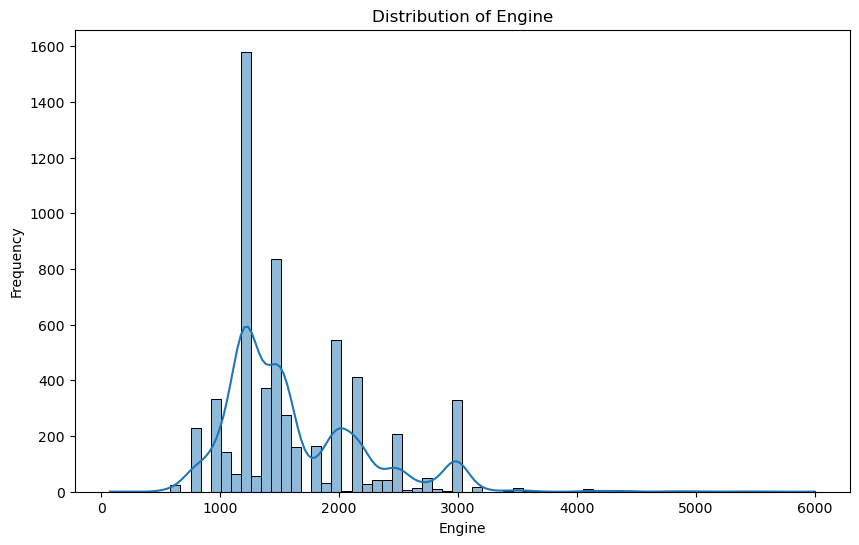

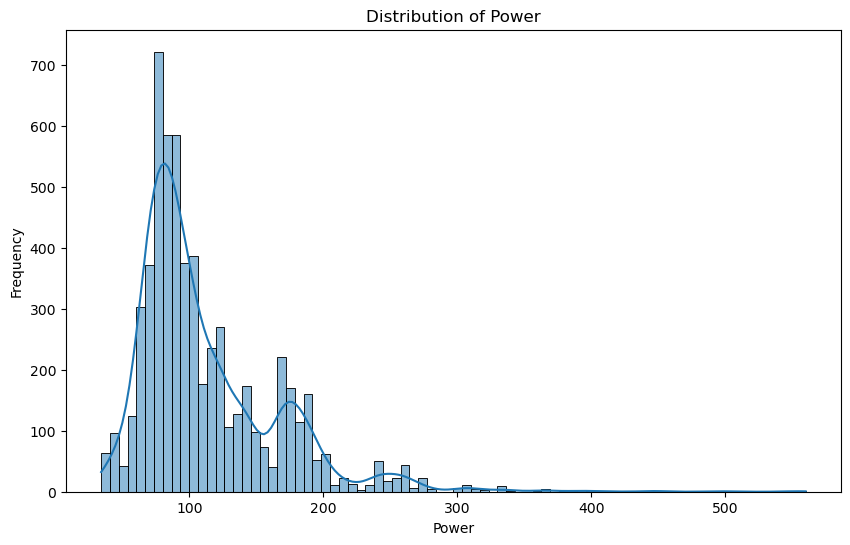

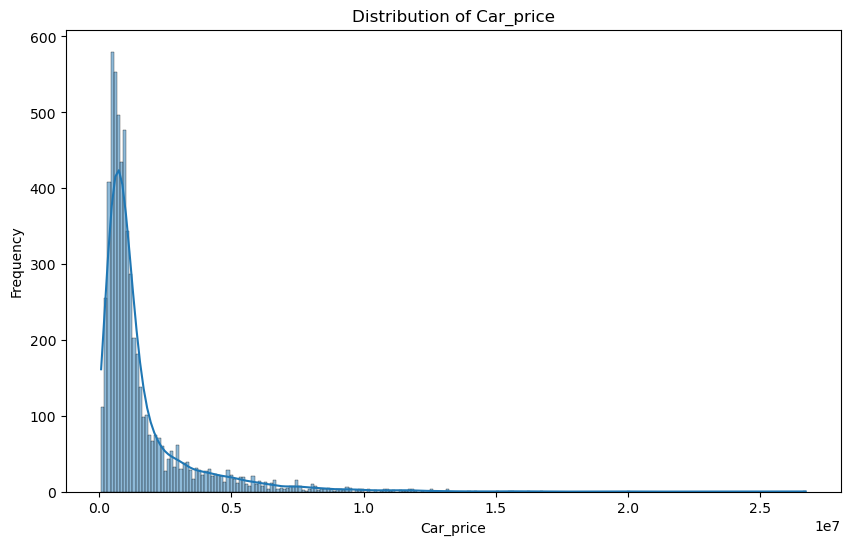

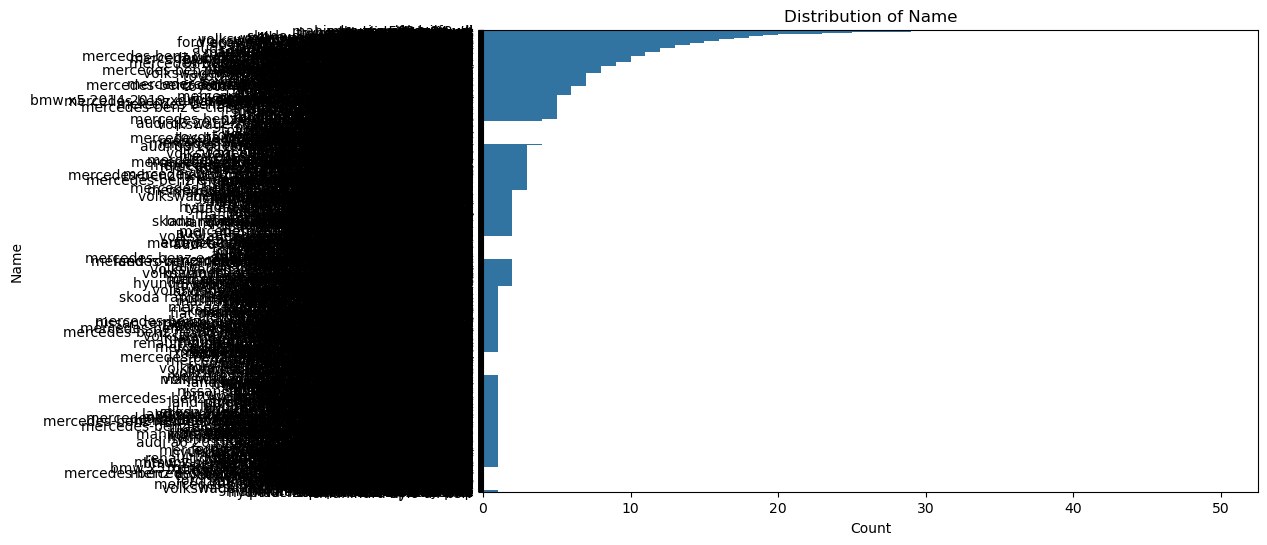

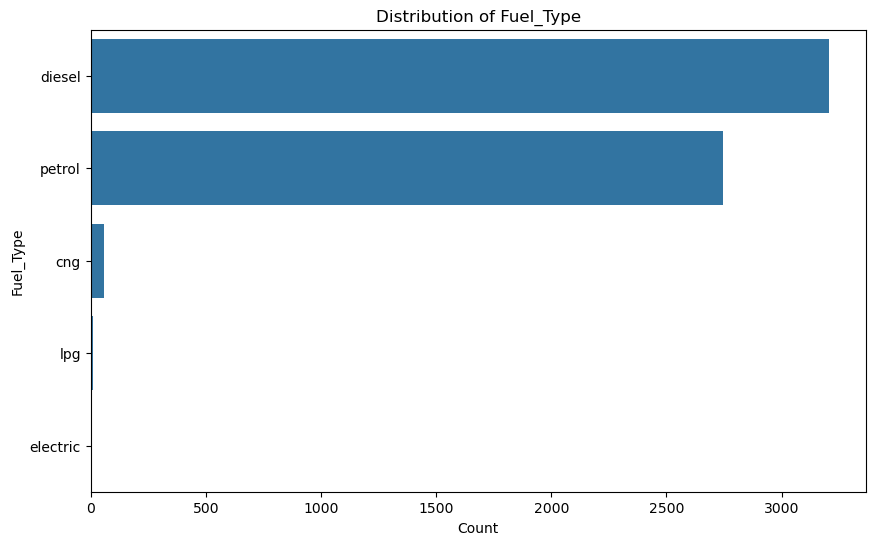

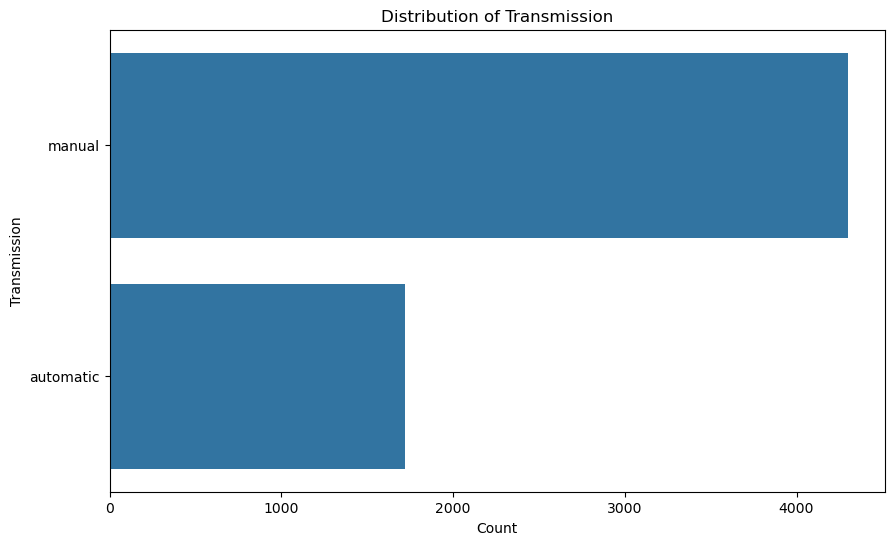

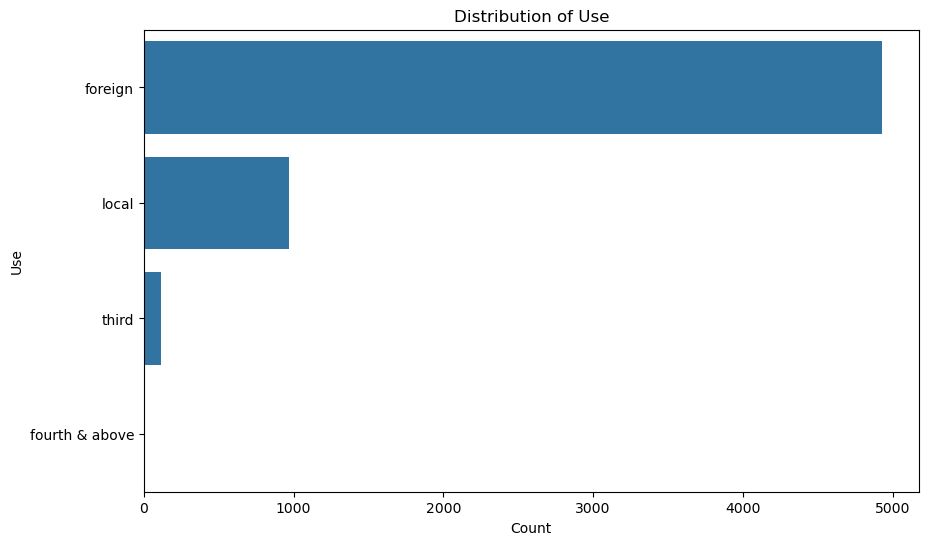

In [16]:
class EDA(DataCleaner):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.cleaned_data = cleaned_df

    def univariate_analysis(self):
        if self.cleaned_data is not None:
            numerical_columns = self.cleaned_data.select_dtypes(include=['float64', 'int64']).columns
            categorical_columns = self.cleaned_data.select_dtypes(include=['object']).columns
            numerical_columns = numerical_columns.drop(['No'], errors='ignore')
            categorical_columns = categorical_columns.drop(['Name'], errors='ignore')

            colors = ['maroon', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

            for i, column in enumerate(numerical_columns):
                plt.figure(figsize=(10, 6))
                sns.histplot(self.cleaned_data[column], kde=True, color=colors[i % len(colors)])
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

            for i, column in enumerate(categorical_columns):
                plt.figure(figsize=(10, 6))
                sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.show()
        else:
            print("No data available for univariate analysis.")

    def bivarent_analysis(self, x_column, y_column, color='purple', x_label=None, y_label=None):
        if self.cleaned_data is not None:
            plt.figure(figsize=(10, 6))
            plt.scatter(self.cleaned_data[x_column], self.cleaned_data[y_column], color=color)
            
            title = f'Relationship Between {x_column} and {y_column}'
            plt.title(title)
            
            plt.xlabel(x_label if x_label else x_column)
            plt.ylabel(y_label if y_label else y_column)
            
            plt.grid(True)
            plt.show()
        else:
            print("No data available for plotting.")

    def correlation_matrix(self):
        numerical_data = self.cleaned_data.select_dtypes(include=['float64', 'int64'])
        plt.figure(figsize=(10, 6))
        sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

eda = EDA(file)


### Univalent Analysis

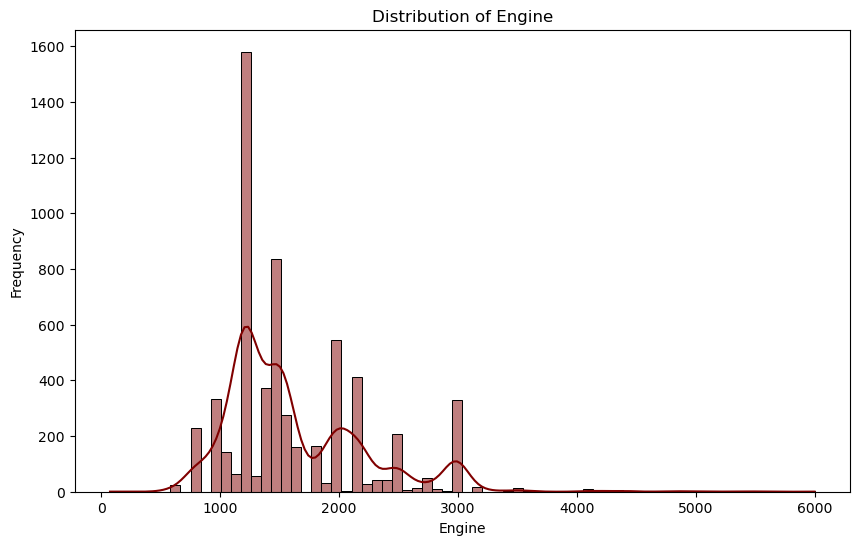

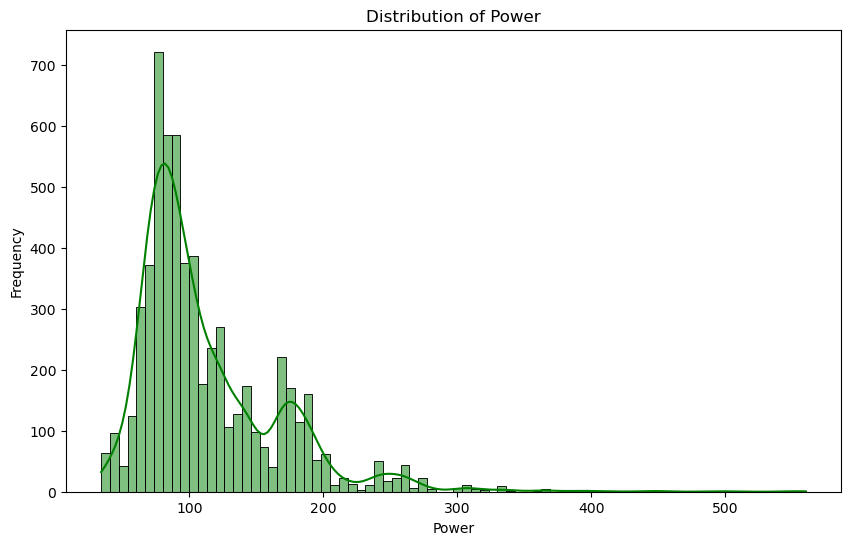

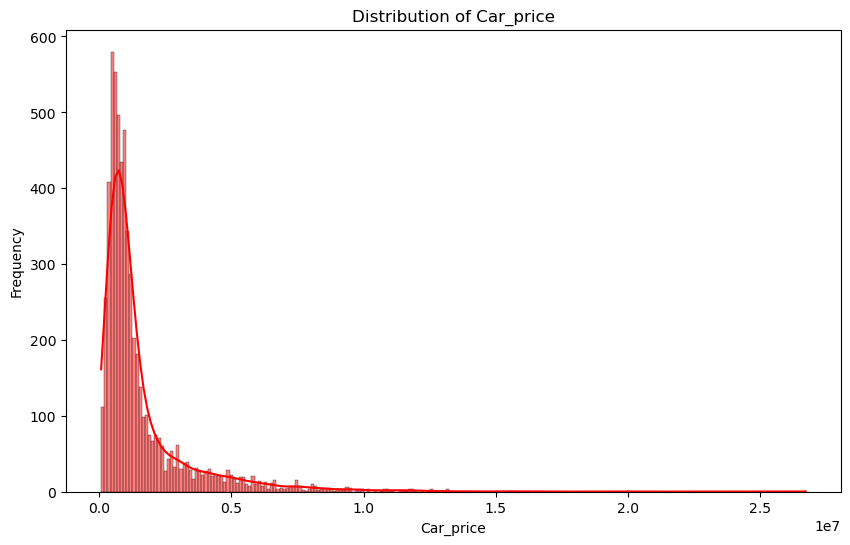

C:\Users\user\AppData\Local\Temp\ipykernel_6576\1336106624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


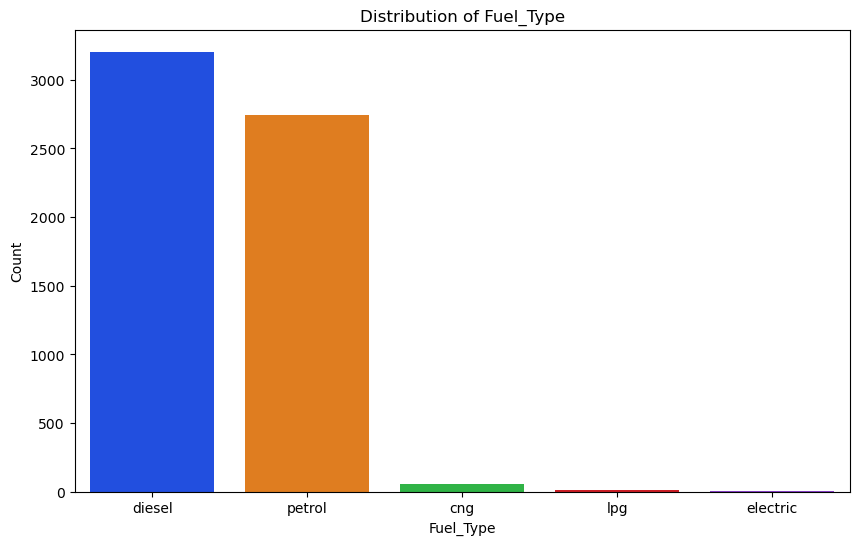

C:\Users\user\AppData\Local\Temp\ipykernel_6576\1336106624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


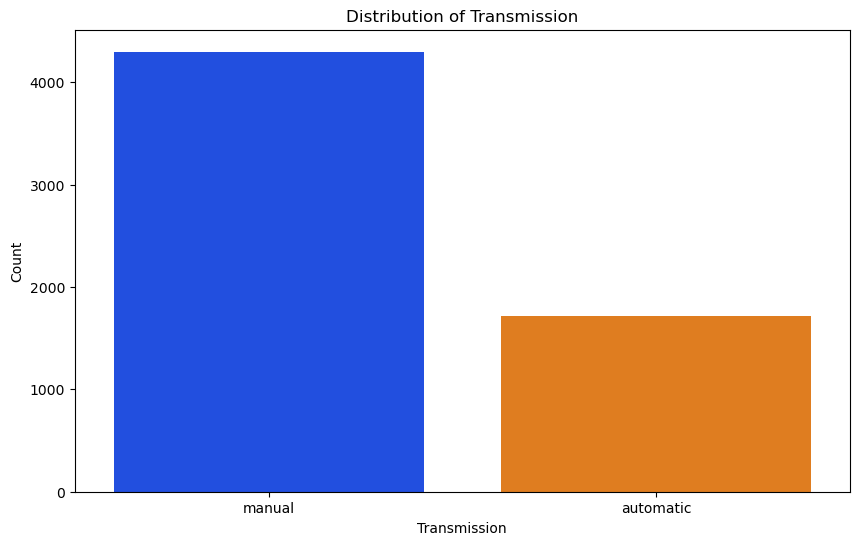

C:\Users\user\AppData\Local\Temp\ipykernel_6576\1336106624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


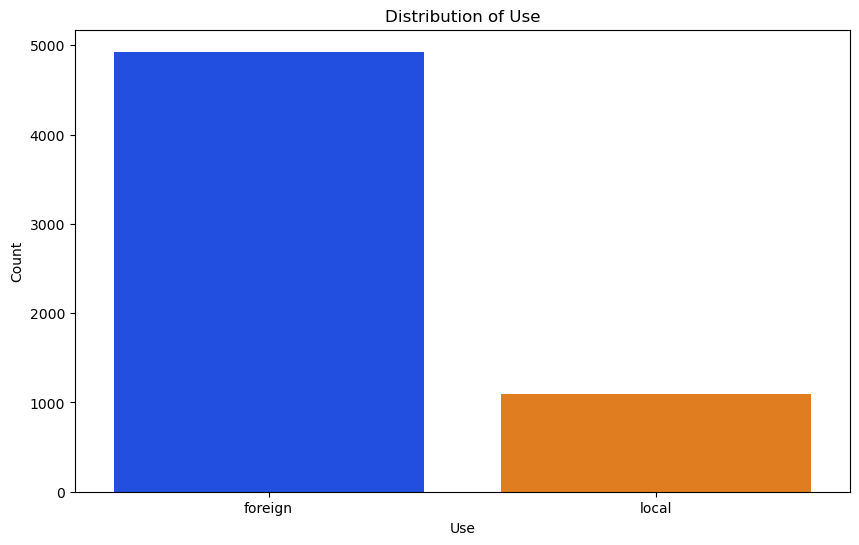

In [8]:
eda.univariate_analysis()

**OBSERVATIONS**

**Distribution of engine**

The engine capacity of most vehicles is between 1000 to 2000cc

**Distribution of power**

Most of the vehicle power is below 100 brake horsepower

**Distribution of car_price**

The price distribution is not normally distributed 

**Distribution of Transmission**

Most cars have a manual transmission

**Distribution of Fuel_type**

Disel power cars seem to be the majority

**Distribution of use**

Most of the vehicles are foreign used



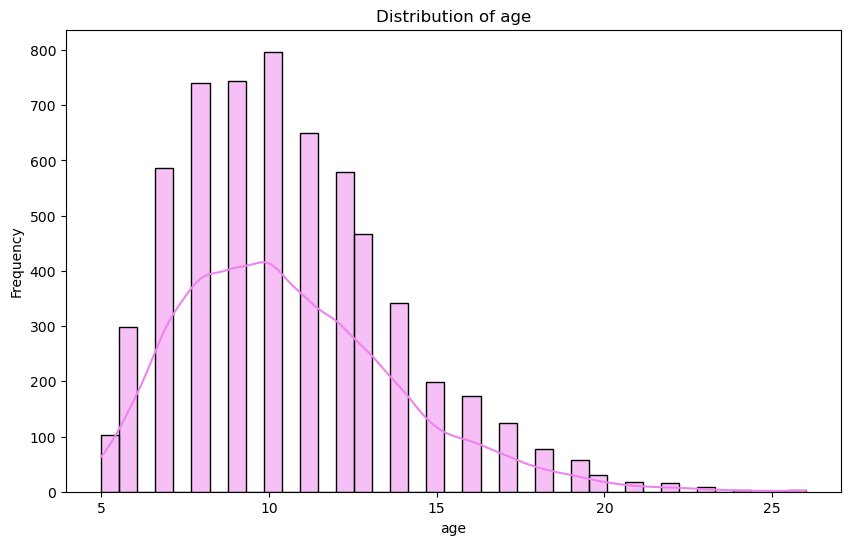

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['age'], kde=True, color='violet')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

**OBSERVATIONS**

Most cars seem to range between 5 to 15 years old

#### Bivalent Analysis

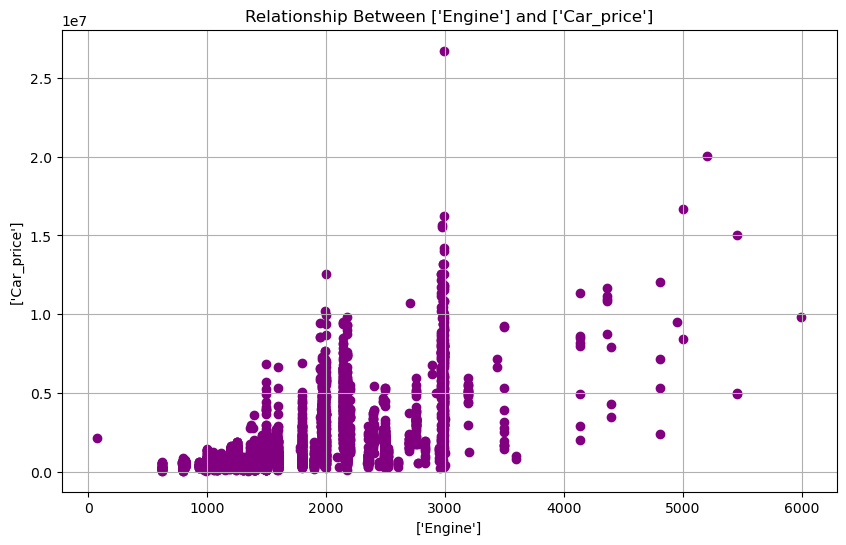

In [10]:
eda.bivarent_analysis(x_column=['Engine'], y_column=['Car_price'], color='purple')

**OBSERVATION**

No significant correlation between the two

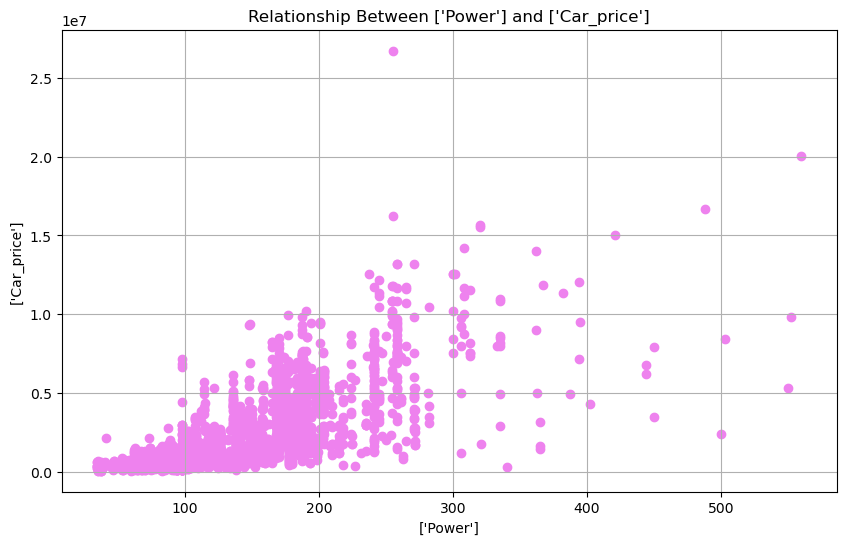

In [11]:
eda.bivarent_analysis(x_column=['Power'], y_column=['Car_price'], color='violet')

**OBSERVATION**

Seems to be a postive correlation between the two variables

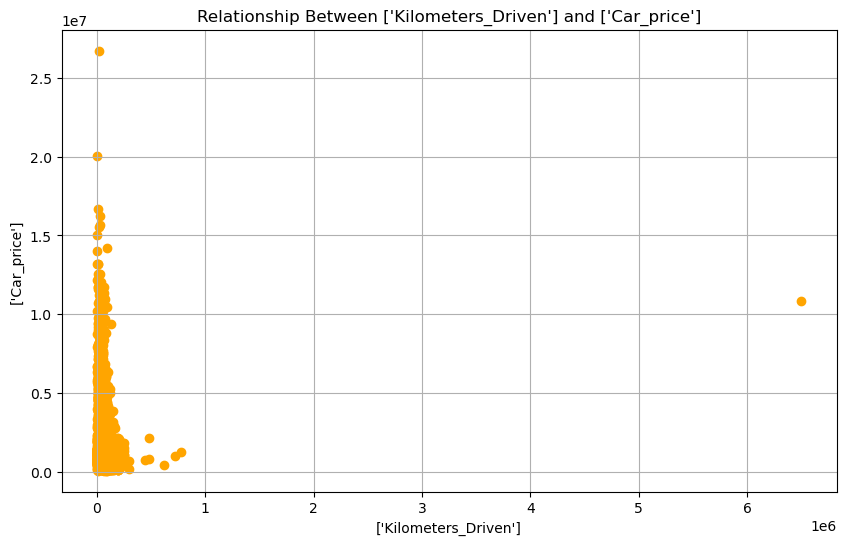

In [12]:
eda.bivarent_analysis(x_column=['Kilometers_Driven'], y_column=['Car_price'], color='orange')

**OBSERVATIONS**

No correlation between the two variables

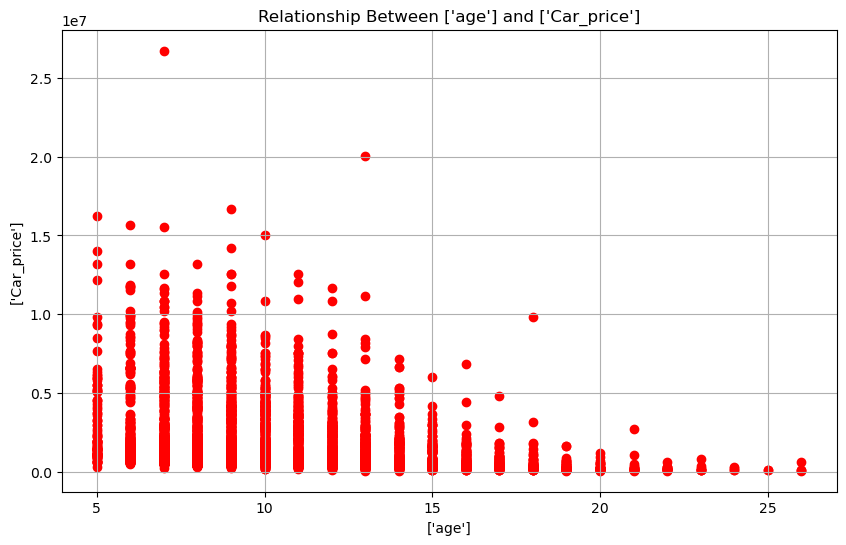

In [13]:
eda.bivarent_analysis(x_column=['age'], y_column=['Car_price'], color='red')

**OBSERVATIONS**

No correlation between the two variables

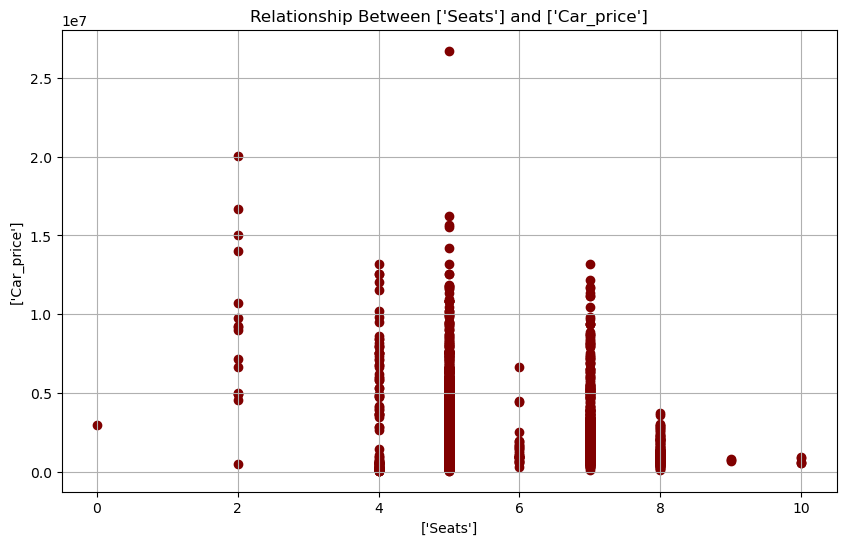

In [14]:
eda.bivarent_analysis(x_column=['Seats'], y_column=['Car_price'], color='maroon')

**OBSERVATIONS**

No correlation between the two variables

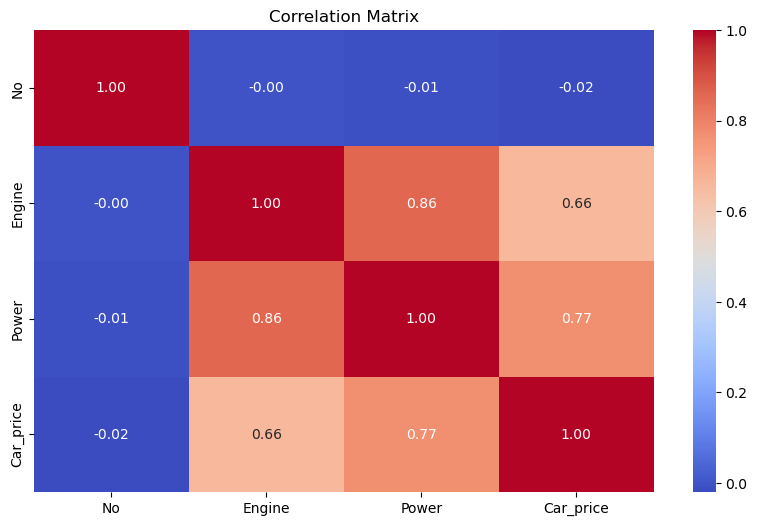

In [15]:
eda.correlation_matrix()

- **Data Quality**: The univariate and bivariate analyses suggest the data is relatively clean, with distributions and relationships that can be used directly or with minimal transformation for modeling.
- **Feature Relationships**: The correlation analysis and scatter plots indicate that certain features have stronger relationships with the target variable, which will be critical in the modeling phase. Highly correlated features with the target variable are expected to be strong predictors.


### Modelling

Linear Regression - Cross-Validation R^2 Scores: [ 0.22492158  0.74554567  0.56392693 -0.07408553  0.09430172]
Linear Regression - Cross-vaidation Mean R^2 Score: 0.31092207348940465
Linear Regression - MAE: 768416.6539497082, MSE: 2375954987232.7007, R^2: 0.3077066677765019


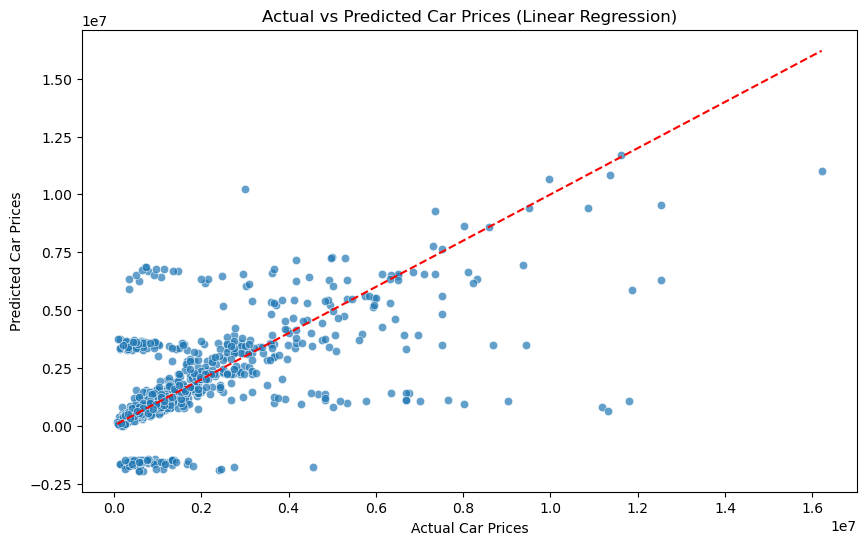

Ridge Regression - Cross-Validation R^2 Scores: [0.77475917 0.7611104  0.77711812 0.81223076 0.71617618]
Ridge Regression - Cross-vaidation Mean R^2 Score: 0.7682789260895803
Ridge Regression - MAE: 460531.8860250741, MSE: 772355509386.6038, R^2: 0.774955092950984


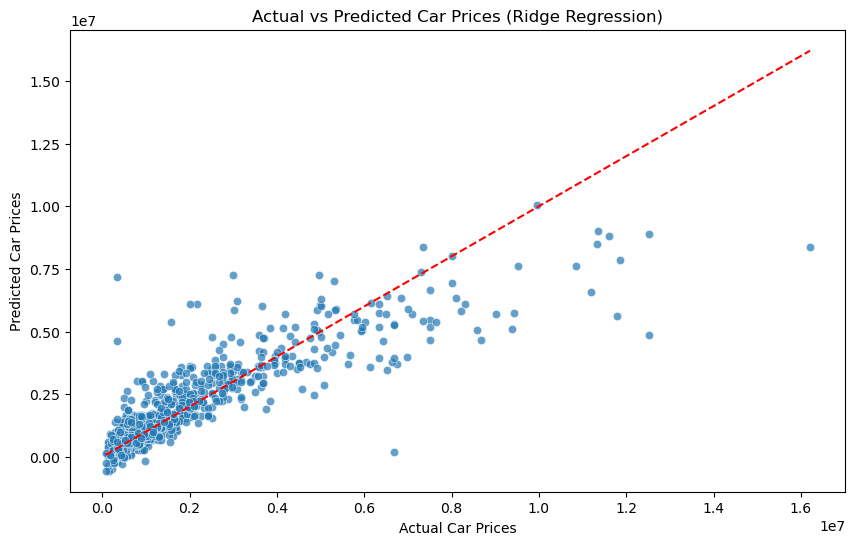

c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286334929594696.5, tolerance: 1356487793798.8208
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302160596488523.3, tolerance: 1407130511132.0688
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255135357957586.7, tolerance: 1256704589181.5354
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-pac

Lasso Regression - Cross-Validation R^2 Scores: [0.70686409 0.76879726 0.7152181  0.73915838 0.66134851]
Lasso Regression - Cross-vaidation Mean R^2 Score: 0.7182772692270888


c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395122446110788.75, tolerance: 1687525907951.802
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression - MAE: 452920.3397046589, MSE: 873723297400.4648, R^2: 0.7454190772767241


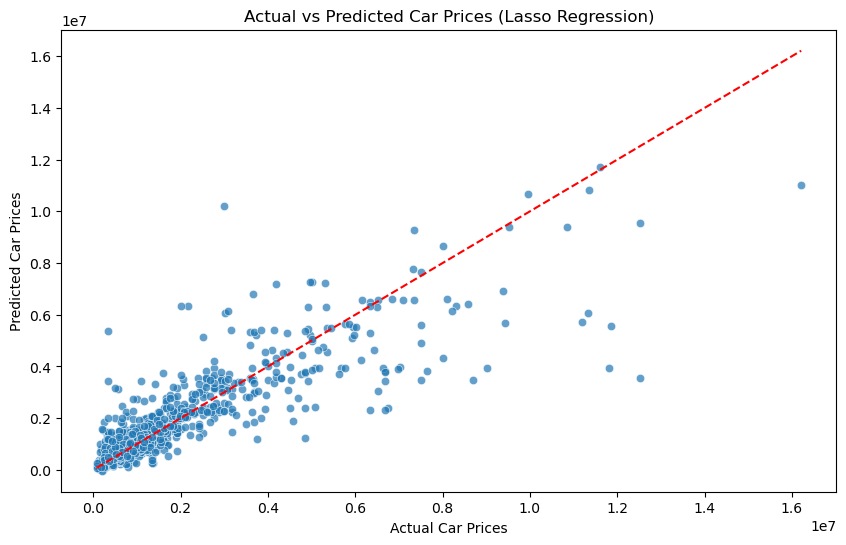

Elastic_net Regression - Cross-Validation R^2 Scores: [0.5965882  0.57837086 0.57817256 0.6213793  0.53987121]
Elastic_net Regression - Cross-vaidation Mean R^2 Score: 0.582876425223919
Elastic_net Regression - MAE: 685961.2995156927, MSE: 1456993451501.0215, R^2: 0.5754688716799881


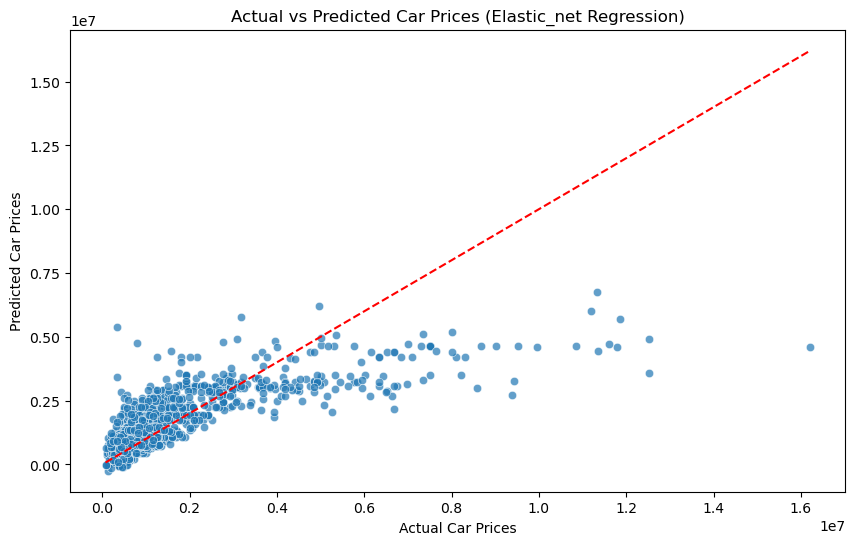

Random Regression - Cross-Validation R^2 Scores: [0.73401818 0.77445012 0.76365699 0.86215294 0.75794951]
Random Regression - Cross-vaidation Mean R^2 Score: 0.7784455464231663
Random Regression - MAE: 394323.8294856209, MSE: 705414199993.1017, R^2: 0.794460101418088


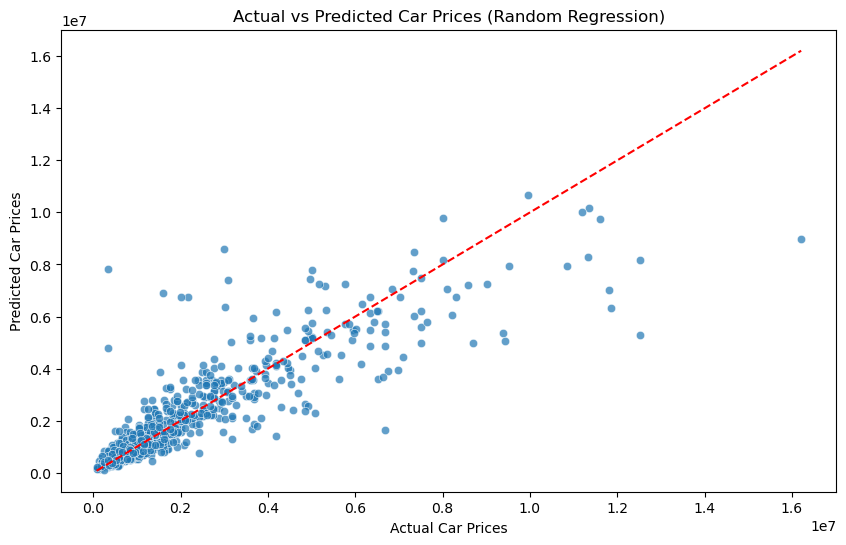

Knn Regression - Cross-Validation R^2 Scores: [0.76881567 0.76847999 0.73751215 0.78671264 0.7258996 ]
Knn Regression - Cross-vaidation Mean R^2 Score: 0.7574840089518894
Knn Regression - MAE: 424082.6295681063, MSE: 875096631183.2393, R^2: 0.7450189224649364


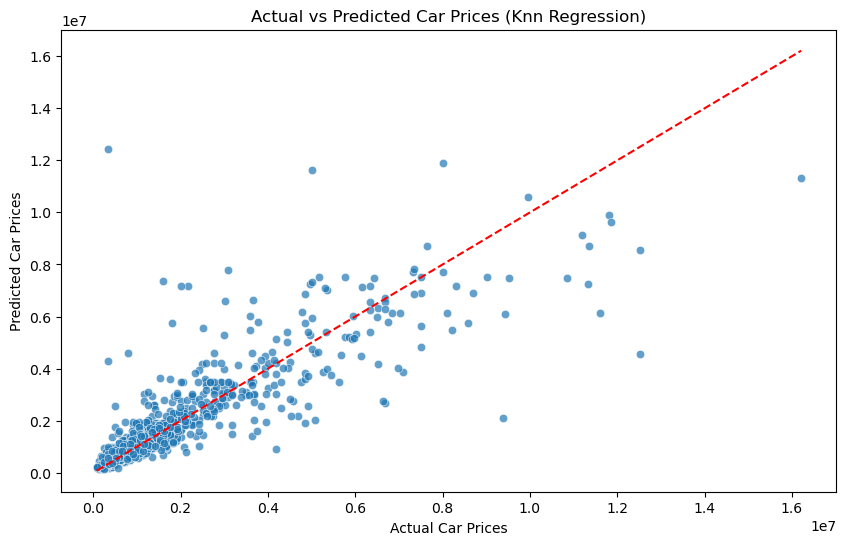

Xgboost Regression - Cross-Validation R^2 Scores: [0.69507898 0.77789036 0.74437092 0.83652114 0.74118529]
Xgboost Regression - Cross-vaidation Mean R^2 Score: 0.759009340330155
Xgboost Regression - MAE: 458122.0485361296, MSE: 733631526747.9545, R^2: 0.7862382843927122


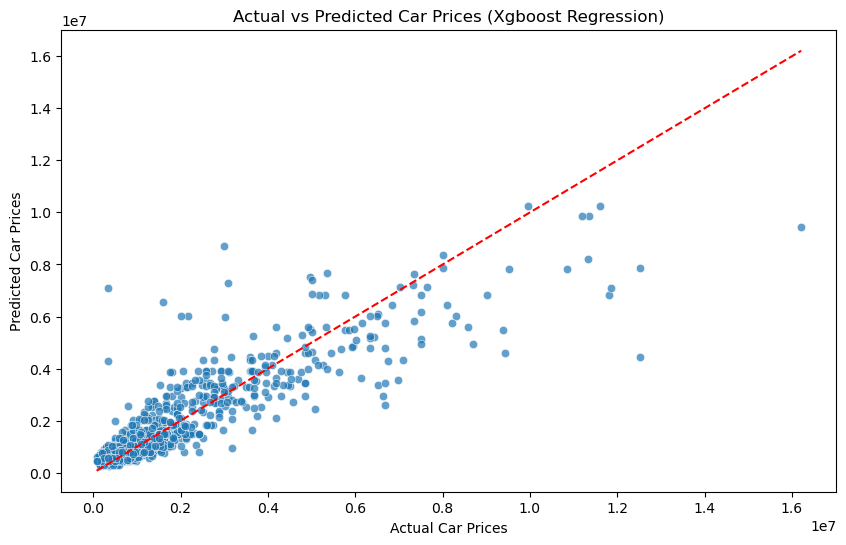

Catboost Regression - Cross-Validation R^2 Scores: [0.72427622 0.75674978 0.7249858  0.82089005 0.73432251]
Catboost Regression - Cross-vaidation Mean R^2 Score: 0.7522448704590177
Catboost Regression - MAE: 491005.3389356362, MSE: 779349349500.9716, R^2: 0.7729172644130564


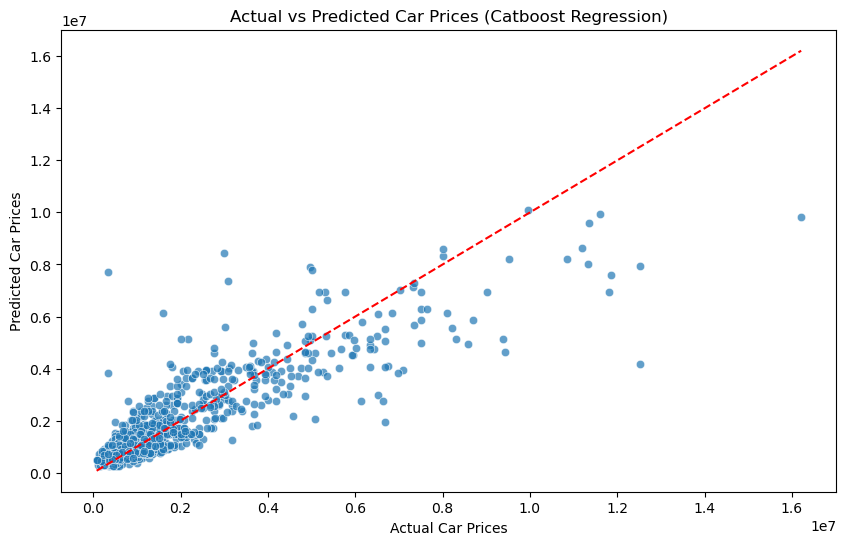

Svr Regression - Cross-Validation R^2 Scores: [-0.14243962 -0.10931146 -0.09832289 -0.12455338 -0.11844663]
Svr Regression - Cross-vaidation Mean R^2 Score: -0.11861479597273986
Svr Regression - MAE: 1001396.707576448, MSE: 3813446906770.4253, R^2: -0.11114220619993831


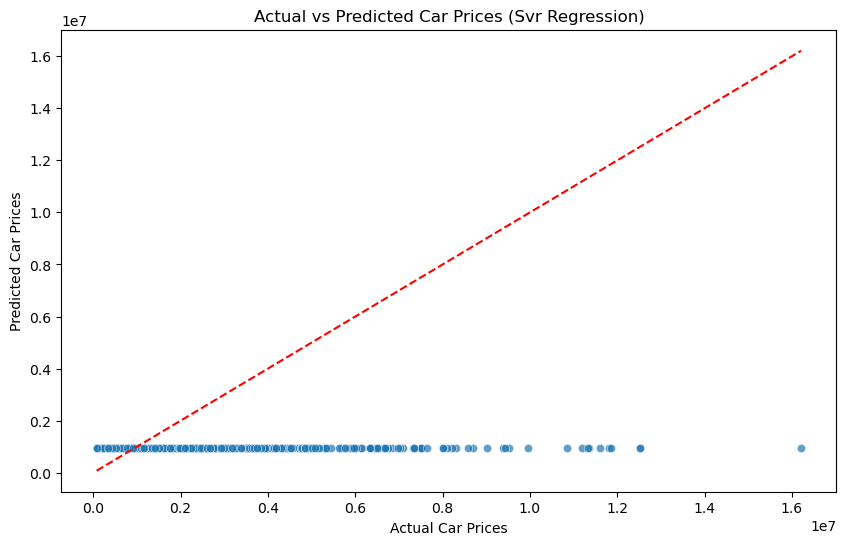

Polynomial Regression - Cross-Validation R^2 Scores: [-0.84652425  0.57246985  0.7210619   0.50464186  0.60585933]
Polynomial Regression - Cross-vaidation Mean R^2 Score: 0.3115017368336557
Polynomial Regression - MAE: 480840.4094634282, MSE: 1135859711763.4583, R^2: 0.6690391404632567


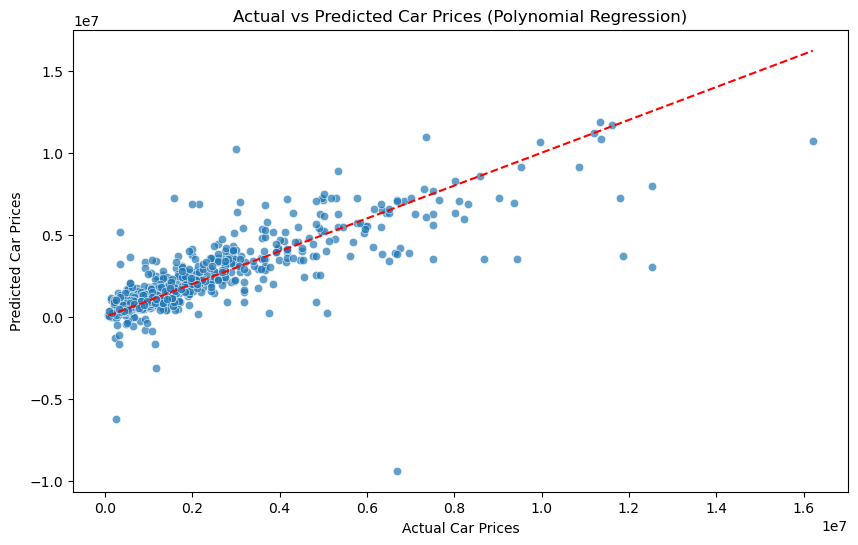

In [16]:
# Creating a class to help us model using different regression models utilizing pipelines
class ModelPipeline(DataCleaner):
    def __init__(self, file):
        super().__init__(file)
        self.cleaned_data = self.clean_data()

    def create_pipeline(self):
        if self.cleaned_data is not None:
            # Define categorical columns to be encoded
            categorical_features = self.cleaned_data.select_dtypes(include=['object']).columns.tolist()
            numerical_features = self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
            numerical_features.remove('Car_price')  # Correctly removing target variable from the list
            numerical_features.remove('No')         # Correctly removing 'No' column from the list

            # Create a column transformer and using 'pass through' to Pass through the numerical features without transformation

            preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 
            # Define the various regression pipelines
            pipelines = {
                'linear': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
                'ridge': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
                'lasso': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso())]),
                'elastic_net': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet())]),
                'random': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
                'knn': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]),
                'xgboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor())]),
                'catboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', CatBoostRegressor(verbose=0))]),
                'svr': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())]),
                'polynomial': Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('poly_features', PolynomialFeatures(include_bias=False)),
                    ('regressor', LinearRegression())
                ])
            }

            # Splitting the data into train and test
            X = self.cleaned_data[numerical_features + categorical_features]
            y = self.cleaned_data['Car_price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Storing the pipelines and data splits
            self.pipelines = pipelines
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test

            return pipelines
    # Function to perform cross validation
    def cross_validate_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Performing cross-validation on our models
        cv_scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=5, scoring='r2')
        print(f'{model_name.capitalize()} Regression - Cross-Validation R^2 Scores: {cv_scores}')
        print(f'{model_name.capitalize()} Regression - Cross-vaidation Mean R^2 Score: {cv_scores.mean()}')

    # Visualizing our model line of best fir
    def visualize_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Fitting the models
        pipeline.fit(self.X_train, self.y_train)

        # Predicting on the test sets
        y_pred = pipeline.predict(self.X_test)

        # Evaluating the models
        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'{model_name.capitalize()} Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')

        # Visualization of Predicted vs Actual Prices of our models
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=y_pred, alpha=0.7)
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], color='red', linestyle='--')
        plt.xlabel('Actual Car Prices')
        plt.ylabel('Predicted Car Prices')
        plt.title(f'Actual vs Predicted Car Prices ({model_name.capitalize()} Regression)')
        plt.show()
# Creating an instance of theclass and calling the create_pipeline method
model_pipeline = ModelPipeline(file)
pipelines = model_pipeline.create_pipeline()

# Cross-validating and visualize the models
if pipelines:
    for model_name in pipelines.keys():
        model_pipeline.cross_validate_model(model_name)
        model_pipeline.visualize_model(model_name)
           
   



- **Random Forest Regression** and **XGBoost Regression** perform the best, with high R² scores and relatively low error metrics, making them strong candidates for predicting car prices.

- **Ridge Regression** and **CatBoost Regression** also perform well, with strong predictive accuracy.

- The support vector regression model is the worst performing model, we will  tune the randomforest regression model using gridsearch to achieve the best performance since its the best performing mode

In [17]:
# isolating our randomforest regressor model

categorical_features = cleaned_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = cleaned_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Car_price')  # Correctly removing target variable from the list
numerical_features.remove('No')


preprocessor = ColumnTransformer(transformers=[ ('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 

random_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

X = cleaned_df[numerical_features + categorical_features]
y = cleaned_df['Car_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_pipeline.fit(X_train, y_train)
y_pred = random_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')




Random Forest Regression - MAE: 394374.8607217193, MSE: 697846005666.269, R^2: 0.7966652822811902


In [ ]:


# Defining the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],       # Number of trees in the forest
    'regressor__max_features': ['log2', 'sqrt'],      # Number of features to consider for the best split
    'regressor__max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4],         # Minimum number of sample
}

# Creating the GridSearchCV 
grid_search = GridSearchCV(
    estimator=random_pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    verbose=2  
)

# Fittinf the GridSearchCV on the train data
grid_search.fit(X_train, y_train)

#finding the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# fitting and testing the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regression with Grid Search - MAE: {mae}, MSE: {mse}, R^2: {r2}')


In [19]:
with open('Best_performing_model.pkl', 'wb') as file:
    pickle.dump(random_pipeline, file)

print("Model saved successfully.")

Model saved successfully.


## Conclusion & Recommendation

This project successfully built a machine learning model to predict the price of used cars in the Kenyan market. The model considered various features such as age, mileage, and condition to estimate market value.

- The exploratory data analysis (EDA) revealed that newer cars, cars with lower mileage, and cars with larger engines and more power generally command higher prices. Additionally, the distribution of listings by fuel type and transmission preferences provided valuable market insights, indicating a preference for manual transmission and specific fuel types.
- The predictive models, including linear regression, Ridge, Lasso, Random Forest, and XGBoost, were trained and evaluated using cross-validation techniques. The models performed well, with Random Forest and XGBoost showing superior predictive accuracy compared to linear models. 
- Random Forest and XGBoost models showed superior performance in terms of prediction accuracy, with R² scores above 0.85, indicating that these models are highly effective for predicting car prices
- These models are effective in estimating car prices, which is crucial for aiding buyers and sellers in making informed decisions in a market that often lacks transparency.

**Price Distribution**: The price of used cars in Kenya shows a concentration around a specific range, with a high density at approximately 0.1 million Kenyan Shillings.

**Vehicle Age:** Most vehicles in the dataset were manufactured around 2014, indicating a market preference for relatively newer cars.

**Mileage:** Vehicles with higher mileage tend to have lower prices, as expected.

**Transmission Type:** There is a higher prevalence of manual transmission vehicles in the Kenyan market.
Fuel Type: Petrol is the most common fuel type, followed by diesel, reflecting consumer preferences and market availability.

As new data becomes available, continuously updating the model with new data to improve accuracy and adapt to market changes, including more granular features such as location, car brand reputation, and market trends could further enhance predictive performance.

Partnerships with car dealerships and online marketplaces in Kenya to integrate the model into their platforms, will provide users with instant price evaluations during the buying or selling process.

**For Buyers** : Leverage Data Insights to make informed purchasing decisions, ensuring a fair price for the car's condition and specifications. 

**For Sellers**: Set competitive prices based on the car's age, condition, and market demand to attract potential buyers.
- Market Trends: Stay informed about market trends and preferences, such as the growing demand for eco-friendly vehicles, to adjust

**For Car Dealers**: Optimize inventory management by understanding the demand for different car types and models.
- Customer Education: Educate customers about the key factors influencing car prices and provide transparent information to build trust.

